In [8]:
vanilla_bert_train_example_per_s    = {"sequence128":1014,"sequence512":187.0, "sequence1024": 62.9, "sequence2048": 17.3, "sequence4096": -10}
cos_bert_train_example_per_s        = {"sequence128":832,"sequence512":197.1, "sequence1024": 78.1, "sequence2048": 21.6, "sequence4096": 15.4}
directmul_bert_train_example_per_s  = {"sequence128":1134,"sequence512":262.0, "sequence1024": 101.4, "sequence2048": 30.9, "sequence4096": 25.8}


vanilla_bert_inference_example_per_s = {"sequence128":931,"sequence512":173.6, "sequence1024": 60.3, "sequence2048": 14.4, "sequence4096": -10}
cos_bert_inference_example_per_s              = {"sequence128":863,"sequence512":224.0, "sequence1024": 111.1, "sequence2048": 50.9, "sequence4096": 26.9}
directmul_bert_inference_example_per_s   = {"sequence128":1052,"sequence512":274.5, "sequence1024": 135.5, "sequence2048": 63.4, "sequence4096": 34.1}

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

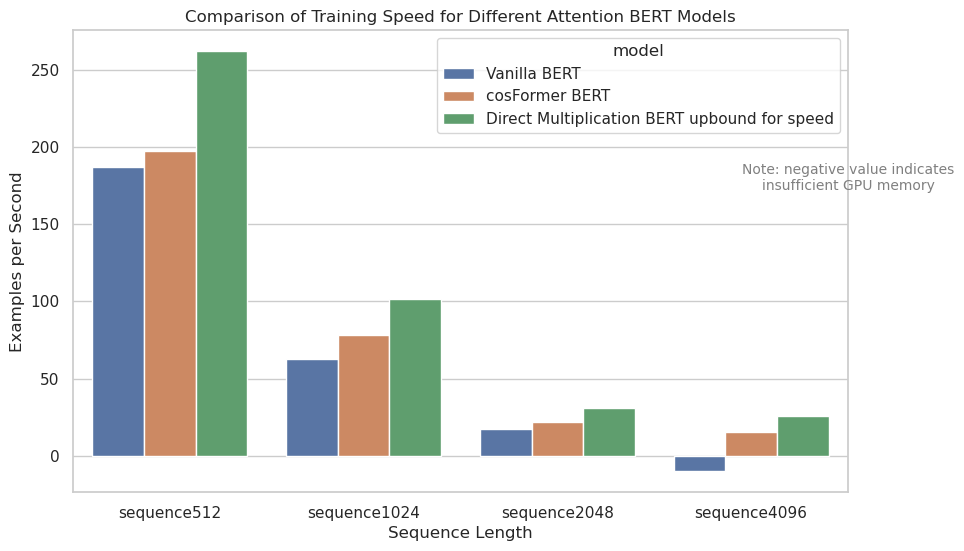

In [10]:
# Convert data to Pandas DataFrame
data = {
    "model": ["Vanilla BERT", "cosFormer BERT", "Direct Multiplication BERT upbound for speed"],
    "sequence512": [vanilla_bert_train_example_per_s["sequence512"], cos_bert_train_example_per_s["sequence512"], directmul_bert_train_example_per_s["sequence512"]],
    "sequence1024": [vanilla_bert_train_example_per_s["sequence1024"], cos_bert_train_example_per_s["sequence1024"], directmul_bert_train_example_per_s["sequence1024"]],
    "sequence2048": [vanilla_bert_train_example_per_s["sequence2048"], cos_bert_train_example_per_s["sequence2048"], directmul_bert_train_example_per_s["sequence2048"]],
    "sequence4096": [vanilla_bert_train_example_per_s["sequence4096"], cos_bert_train_example_per_s["sequence4096"], directmul_bert_train_example_per_s["sequence4096"]]
}
df = pd.DataFrame(data)

# Melt DataFrame
df_melt = pd.melt(df, id_vars=["model"], var_name="sequence", value_name="train_speed")

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x="sequence", y="train_speed", hue="model", data=df_melt)
ax.set_title("Comparison of Training Speed for Different Attention BERT Models")
ax.set_xlabel("Sequence Length")
ax.set_ylabel("Examples per Second")
ax.text(3.5, 180, "Note: negative value indicates\ninsufficient GPU memory", ha="center", va="center", fontsize=10, color="gray")
plt.show()

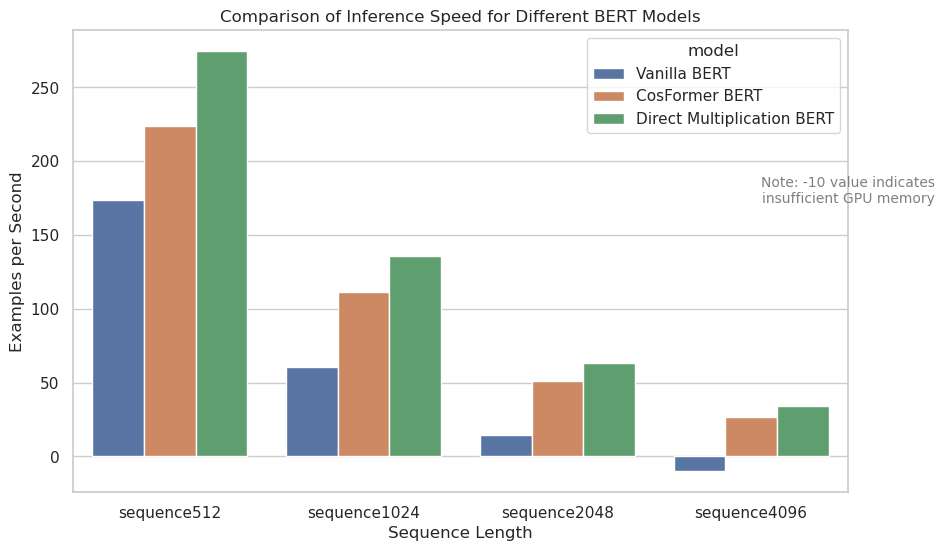

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


# Convert data to Pandas DataFrame
data = {
    "model": ["Vanilla BERT", "CosFormer BERT", "Direct Multiplication BERT"],
    "sequence512": [vanilla_bert_inference_example_per_s["sequence512"], cos_bert_inference_example_per_s["sequence512"], directmul_bert_inference_example_per_s["sequence512"]],
    "sequence1024": [vanilla_bert_inference_example_per_s["sequence1024"], cos_bert_inference_example_per_s["sequence1024"], directmul_bert_inference_example_per_s["sequence1024"]],
    "sequence2048": [vanilla_bert_inference_example_per_s["sequence2048"], cos_bert_inference_example_per_s["sequence2048"], directmul_bert_inference_example_per_s["sequence2048"]],
    "sequence4096": [vanilla_bert_inference_example_per_s["sequence4096"], cos_bert_inference_example_per_s["sequence4096"], directmul_bert_inference_example_per_s["sequence4096"]]
}
df = pd.DataFrame(data)

# Melt DataFrame
df_melt = pd.melt(df, id_vars=["model"], var_name="sequence", value_name="inference_speed")

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x="sequence", y="inference_speed", hue="model", data=df_melt)
ax.set_title("Comparison of Inference Speed for Different BERT Models")
ax.set_xlabel("Sequence Length")
ax.set_ylabel("Examples per Second")

# Add note about -1 values
ax.text(3.5, 180, "Note: -10 value indicates\ninsufficient GPU memory", ha="center", va="center", fontsize=10, color="gray")

plt.show()